# Thesis plots

In [1]:
import os

colab = True
# #### COLAB ONLY CELL
if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    # drive.mount('/content/gdrive',force_remount=True)
    os.chdir("/content/gdrive/MyDrive/COMEXT")
    !pip install -q -r world-trade-thesis/requirements.txt
    !pwd
else:
    os.chdir("H:/My Drive/COMEXT")
    !pwd

import random, math, os, pickle, sys, powerlaw, hashlib #,eurostat
import pandas as pd
import numpy as np
import networkx as nx
from tqdm.notebook import tqdm, trange
from networkx.readwrite import json_graph
from networkx.classes.function import degree
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from scipy.optimize import curve_fit
# from sklearn.preprocessing import MinMaxScaler


if colab:
    sys.path.append('/content/gdrive/MyDrive/COMEXT/world-trade-thesis/src')
else:
    sys.path.append('H:/My Drive/COMEXT/world-trade-thesis/src')
import graph_analysis as g
# exec(open("world-trade-thesis/src/graph_analysis.py","r").read())

df_pop, eu_iso = g.load_population_df()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/COMEXT
Functions loaded!


In [ ]:
# exec(open("world-trade-thesis/src/graph_analysis.py","r").read())

Functions loaded!


## Nomenclatures

In [ ]:
df_complete = g.load_filtered_data("complete", save=True, force_reload=True, columns=g.full_columns, types=g.full_types, 
                        group_by_prod_code=False, n_digits=2, years=[2019], months=None, product="all", 
                        flow="all", trade_type="all", declarant_iso="all", partner_iso="all")

loading complete: 

2019 ,	 Table loaded


In [ ]:
df_wto19 = pd.read_parquet("./data-samples/wto/Years/wto201952.parquet")

In [ ]:
df_wto19.astype(g.full_types)

In [ ]:
df_wto = g.load_filtered_data("wto", save=True, force_reload=True, columns=g.full_columns, types=g.full_types, 
                        group_by_prod_code=False, n_digits=2, years=[2019], months=None, product="all", 
                        flow="all", trade_type="all",  declarant_iso="all", partner_iso="all")

loading wto: 

2019 ,	 Table loaded


In [ ]:
df_wto

,PRODUCT_CPA2_1,DECLARANT_ISO,PARTNER_ISO,FLOW,PERIOD,VALUE_IN_EUROS,QUANTITY_IN_KG
0,TOTAL,EU,CN,1,201952,407670435368,0
1,TOTAL,US,CN,1,201952,397976156388,0
2,TOTAL,US,MX,1,201952,309919808224,0
3,TOTAL,US,CA,1,201952,266419196955,0
4,TOTAL,EU,US,1,201952,242370543978,0
...,...,...,...,...,...,...,...
643730,2012,CA,GT,1,201952,0,0
643731,0812,NA,GT,1,201952,0,0
643732,2011,ZA,ZM,1,201952,0,0
643733,2011,ZA,KE,1,201952,0,0


In [ ]:
cpa = g.files_dict["full"]
cpa["level"] = cpa.code.str.len()
cpa_l2 = cpa[cpa.level == 2]

In [ ]:
cpa[(cpa.code == "2572")|(cpa.code == "2")|(cpa.code == "25")|(cpa.code == "257")]
cpa.loc[2209:2220]

,code,name,level
2209,2572,Locks and hinges,4
2210,25721,Locks and hinges,5
2211,257211,"Padlocks, locks used for motor vehicles and fo...",6
2212,257212,"Other locks, of base metal",6
2213,257213,"Clasps and frames with clasps, incorporating l...",6
2214,257214,"Hinges, mountings, fittings and similar articl...",6
2215,25729,Sub-contracted operations as part of manufactu...,5
2216,257299,Sub-contracted operations as part of manufactu...,6
2217,2573,Tools,4
2218,25731,"Hand tools of a kind used in agriculture, hort...",5


## full tex 

In [ ]:
df_full = pd.read_parquet("./data-samples/full/Months/full200101.parquet")

In [ ]:
col_l = ['DECLARANT', 'DECLARANT_ISO', 'PARTNER', 'PARTNER_ISO', 'TRADE_TYPE',
       'PRODUCT_NC', 'PRODUCT_SITC', 'PRODUCT_cpa2002', 'PRODUCT_cpa2008',
       'PRODUCT_CPA2_1', 'PRODUCT_BEC', 'PRODUCT_SECTION', 'FLOW',
       'PERIOD', 'VALUE_IN_EUROS',
       'QUANTITY_IN_KG']

In [ ]:
# df_full.sort_values("VALUE_IN_EUROS",ascending=False, inplace=True)
df_full_tex = df_full[df_full.VALUE_IN_EUROS > 10000][col_l].sample(frac=1).head(50)

In [ ]:
print(df_full_tex.reset_index(drop=True).to_latex("world-trade-thesis/tex/tables/table.tex",index=False))

None


<ipython-input-6-455e4b555770>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_full_tex.reset_index(drop=True).to_latex("world-trade-thesis/tex/tables/table.tex",index=False))


In [ ]:
df_full_tex.to_latex()

## double flows tex

In [ ]:
cs = ["IT","DE","FR"]
cols = ["DECLARANT_ISO","PARTNER_ISO","PRODUCT_CPA2_1","FLOW","VALUE_IN_EUROS","QUANTITY_IN_KG"]
df_full_sum = df_full.groupby(cols[:-2],as_index=False).sum()
inds = df_full_sum[cols][(df_full_sum.PRODUCT_CPA2_1 != "TOTAL")&df_full_sum.DECLARANT_ISO.isin(cs)&df_full_sum.PARTNER_ISO.isin(cs)].sort_values("VALUE_IN_EUROS",ascending=False).iloc[:12].index
df_full_sum_tex = df_full_sum[cols].loc[inds].reset_index(drop=True)
df_full_sum_tex.index += 1
print(df_full_sum_tex.to_latex().replace("  "," ").replace("  "," ").replace("  "," ").replace("  "," "))

\begin{tabular}{llllrrr}
\toprule
{} & DECLARANT\_ISO & PARTNER\_ISO & PRODUCT\_CPA2\_1 & FLOW & VALUE\_IN\_EUROS & QUANTITY\_IN\_KG \\
\midrule
1 & FR & DE & 3030 & 1 & 998489363 & 1382900 \\
2 & FR & DE & 3030 & 2 & 966169449 & 1364000 \\
3 & DE & FR & 3030 & 2 & 881409845 & 1304400 \\
4 & DE & FR & 3030 & 1 & 864220804 & 987500 \\
5 & DE & IT & 2910 & 2 & 813715037 & 74684600 \\
6 & FR & DE & 2910 & 1 & 733060859 & 70374600 \\
7 & IT & DE & 2910 & 1 & 670018217 & 69451300 \\
8 & DE & FR & 2910 & 2 & 649603453 & 62301400 \\
9 & FR & IT & 2910 & 2 & 321173553 & 39932800 \\
10 & IT & FR & 2910 & 1 & 316036092 & 38002800 \\
11 & FR & IT & 3030 & 1 & 252268490 & 402900 \\
12 & IT & FR & 2910 & 2 & 216223305 & 27218400 \\
\bottomrule
\end{tabular}



## nom tex

In [ ]:
countries = pd.read_table("./data-samples/nomenclature/PARTNER_ISO.txt",header=None,na_filter=None)

In [ ]:
c_tex = countries[[0,3]].drop_duplicates().rename(columns={0:"ISO 2 CODE",3:"COUNTRY NAME"})
c_tex.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)

<ipython-input-3-25a129f29d2c>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  c_tex.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)


In [ ]:
pd.set_option('display.max_colwidth', 255)

In [ ]:
c_tex.iloc[:287//2].shape, c_tex.iloc[287//2:].shape

((143, 2), (144, 2))

In [ ]:
c_tex2 = pd.concat([c_tex.iloc[:(287//2+1)].reset_index(drop=True), c_tex.iloc[(287//2+1):].reset_index(drop=True)],axis=1)

In [ ]:
c_tex2.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)

<ipython-input-19-0c2855509758>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  c_tex2.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)


## Growth plot

In [ ]:
g.full_columns.insert(3,"TRADE_TYPE")
g.full_columns

['PRODUCT_CPA2_1',
 'DECLARANT_ISO',
 'PARTNER_ISO',
 'TRADE_TYPE',
 'FLOW',
 'PERIOD',
 'VALUE_IN_EUROS',
 'QUANTITY_IN_KG']

In [ ]:
# df = g.load_filtered_data("full", save=True, force_reload=True, columns=g.full_columns, types=g.full_types, 
#                         group_by_prod_code=False, n_digits=2, years="all", months="all", product=["TOTAL"], 
#                         flow="all", trade_type="all", declarant_iso="all", partner_iso="all")
df = pd.read_parquet("./data-samples/full/full_TOTAL.parquet")
# df.to_parquet("./data-samples/full/full_TOTAL.parquet")

In [ ]:
df_price = df[df.QUANTITY_IN_KG != 0].reset_index().copy()

In [ ]:
df_price["PRICE"] = df_price.VALUE_IN_EUROS/df_price.QUANTITY_IN_KG

In [ ]:
df_sum = df[df.TRADE_TYPE == "I"].groupby("PERIOD").sum()
# df_sum = df[df.PARTNER_ISO.isin(eu_iso)].groupby("PERIOD").sum()
df_price_sum = df_price[df_price.TRADE_TYPE == "I"].groupby("PERIOD").mean()

In [ ]:
df_price_sum.drop(df_sum.iloc[df_sum.QUANTITY_IN_KG.argmax()].name,inplace=True)
df_sum.drop(df_sum.iloc[df_sum.QUANTITY_IN_KG.argmax()].name,inplace=True)

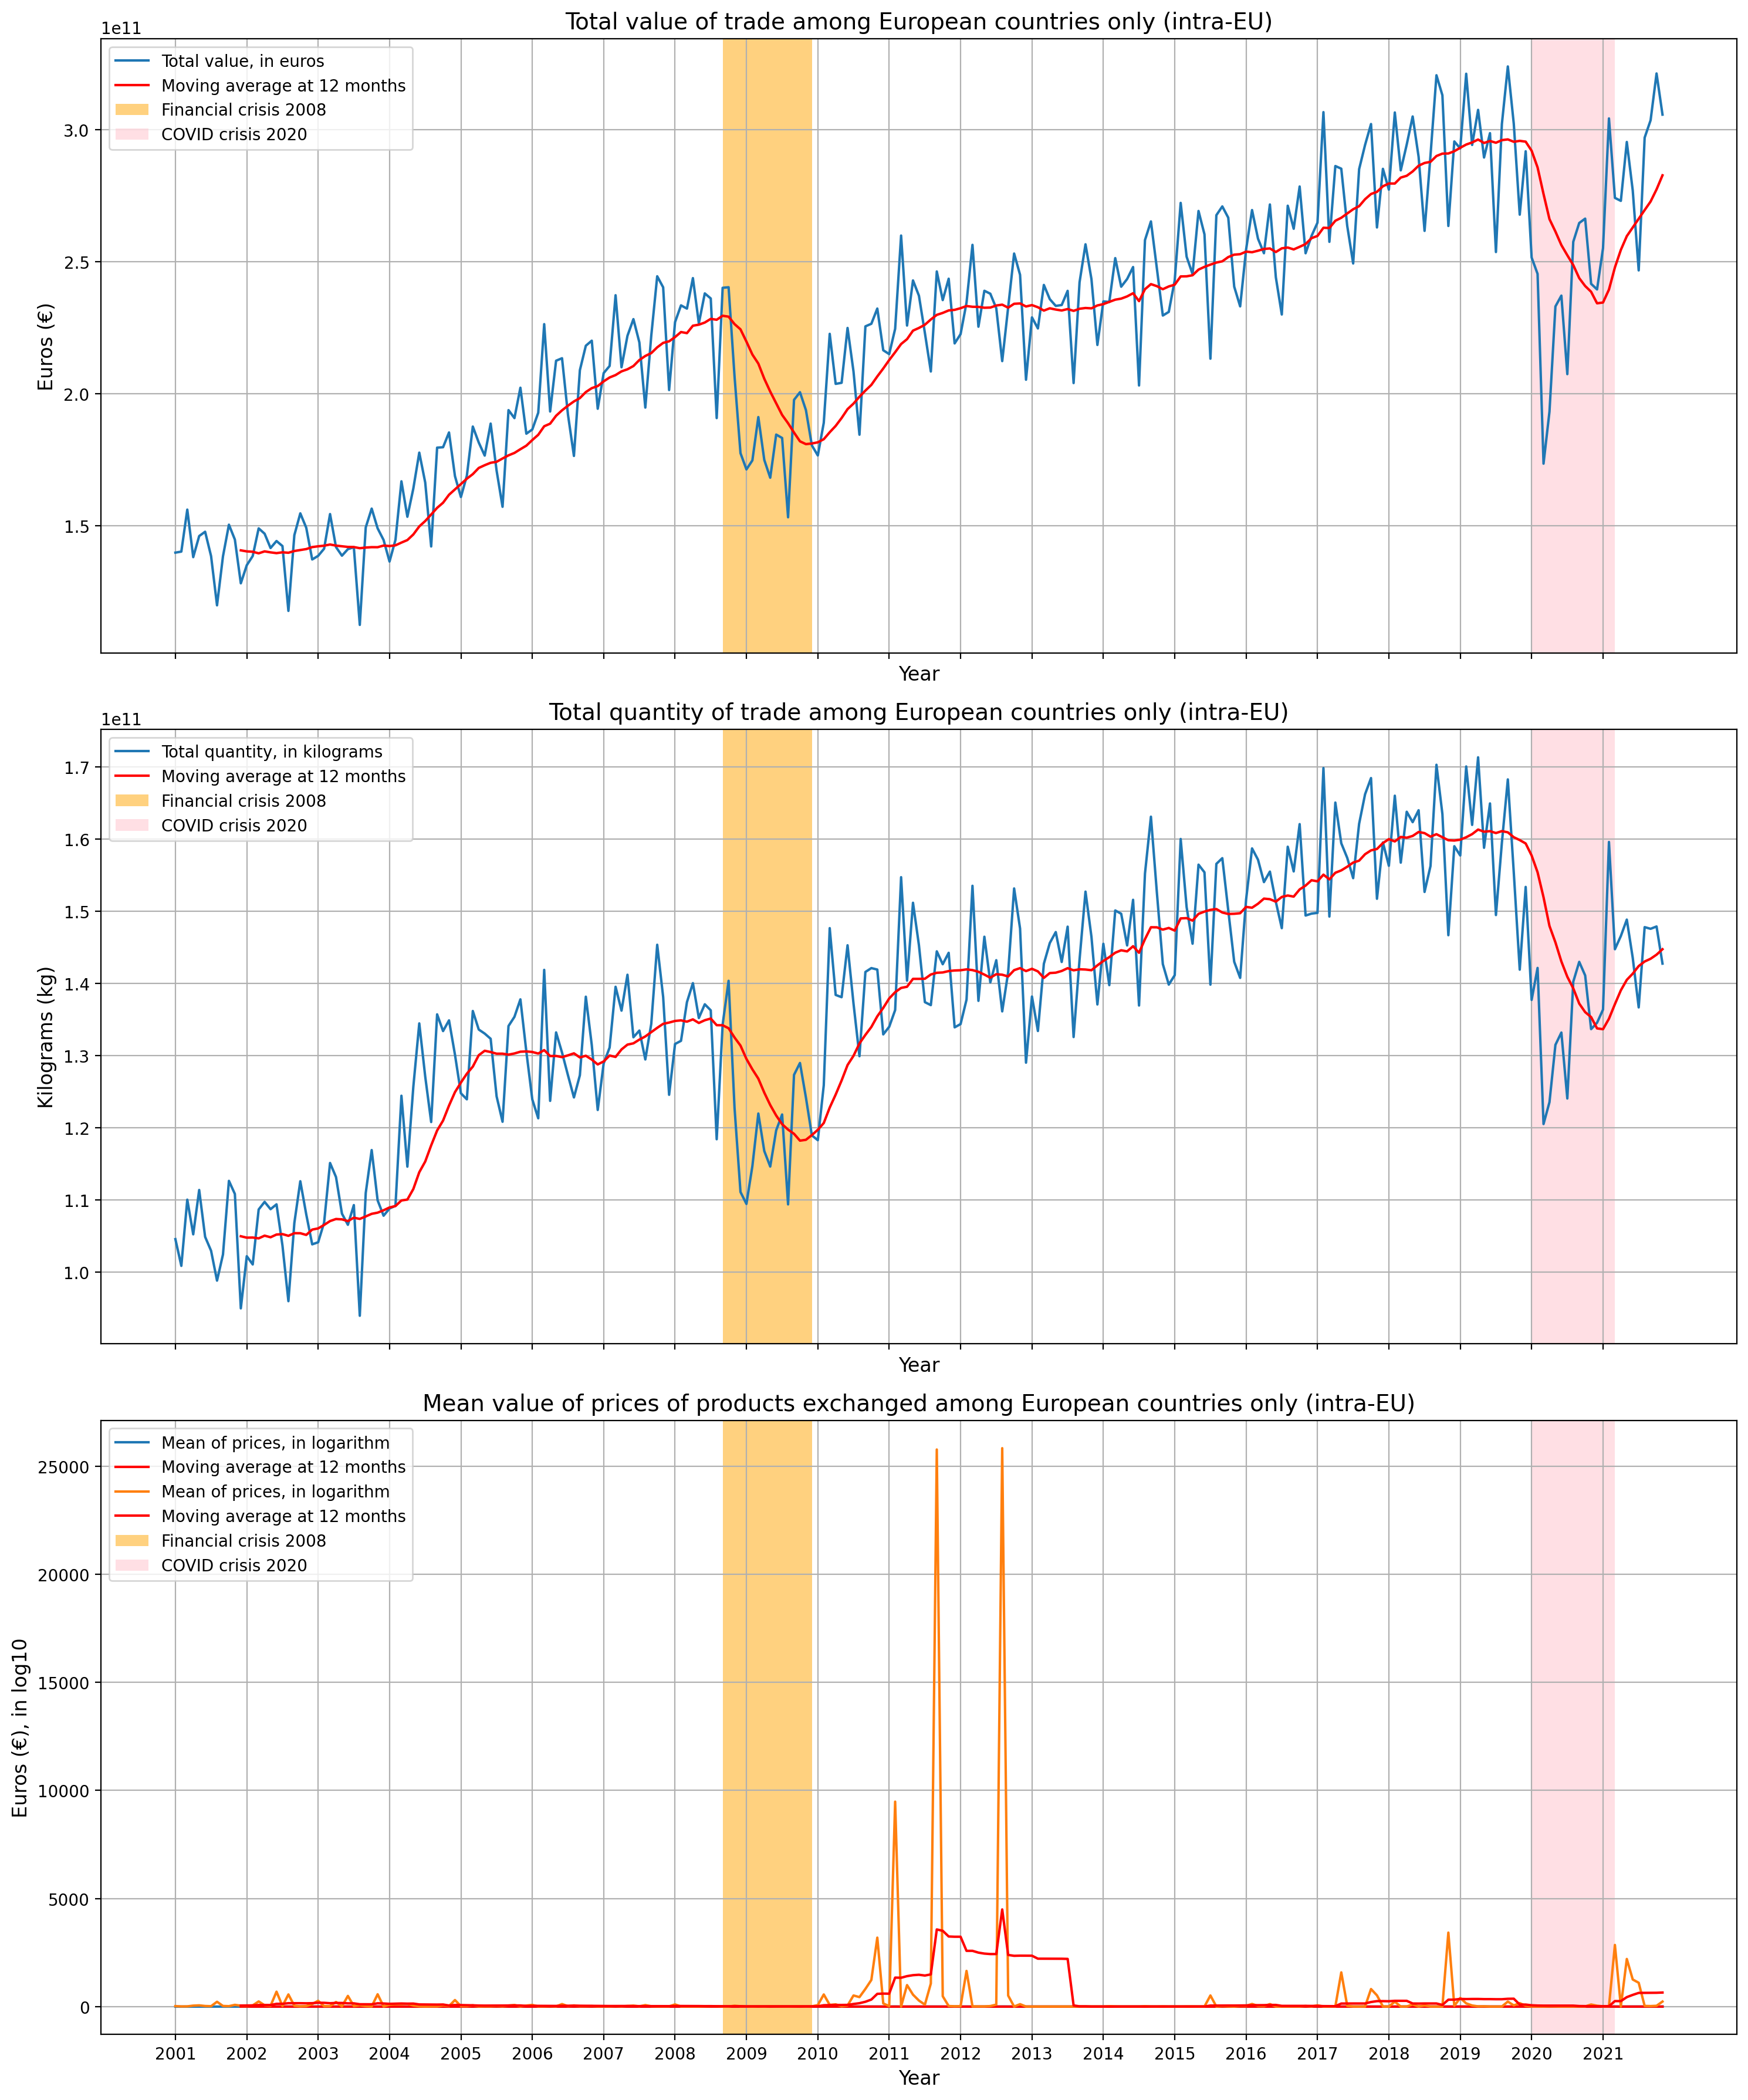

In [ ]:
fig, ax = plt.subplots(3,1,sharex=True,dpi=200,facecolor="w",figsize=(15,18),tight_layout=True)
# FIRST PLOT
ax[0].plot((df_sum.VALUE_IN_EUROS/2),label="Total value, in euros")
ax[0].plot((df_sum.VALUE_IN_EUROS/2).rolling(12).mean(),label="Moving average at 12 months",color="r")
ax[0].axvspan(92, 107, facecolor='orange', alpha=0.5, label="Financial crisis 2008")
ax[0].axvspan(228, 242, facecolor='pink', alpha=0.5, label="COVID crisis 2020")
ax[0].set_ylabel("Euros (€)",fontsize=12)
ax[0].set_xlabel("Year",fontsize=12)
# ax[0].set_xticks(labels=df_sum.index[0:-1:6])
# ax[0].tick_params(rotation=45)
ax[0].set_title("Total value of trade among European countries only (intra-EU)",fontsize=14)
ax[0].legend()
ax[0].grid()
# SECOND PLOT
ax[1].plot((df_sum.QUANTITY_IN_KG/2),label="Total quantity, in kilograms")
ax[1].plot((df_sum.QUANTITY_IN_KG/2).rolling(12).mean(),label="Moving average at 12 months",color="r")
ax[1].axvspan(92, 107, facecolor='orange', alpha=0.5, label="Financial crisis 2008")
ax[1].axvspan(228, 242, facecolor='pink', alpha=0.5, label="COVID crisis 2020")
ax[1].set_ylabel("Kilograms (kg)",fontsize=12)
ax[1].set_xlabel("Year",fontsize=12)
ax[1].set_title("Total quantity of trade among European countries only (intra-EU)",fontsize=14)
ax[1].legend()
ax[1].grid()
# THIRD PLOT
ax[2].plot(np.log10(df_price_sum.PRICE/2),label="Mean of prices, in logarithm")
ax[2].plot(np.log10(df_price_sum.PRICE/2).rolling(12).mean(),label="Moving average at 12 months",color="r")
ax[2].plot((df_price_sum.PRICE/2),label="Mean of prices, in logarithm")
ax[2].plot((df_price_sum.PRICE/2).rolling(12).mean(),label="Moving average at 12 months",color="r")
ax[2].axvspan(92, 107, facecolor='orange', alpha=0.5, label="Financial crisis 2008")
ax[2].axvspan(228, 242, facecolor='pink', alpha=0.5, label="COVID crisis 2020")
# ax[2].set_yscale("log")
ax[2].set_ylabel("Euros (€), in log10",fontsize=12)
ax[2].set_xlabel("Year",fontsize=12)
ax[2].set_title("Mean value of prices of products exchanged among European countries only (intra-EU)",fontsize=14)
ax[2].legend()
ax[2].grid()
ax[0].set_xticks(ticks=df_sum.index[0:-1:12], labels=df_sum.index[0:-1:12].str[:4])
# ax[2].tick_params(labelrotation=90)
plt.savefig("./pics/TOTAL_VQP_INTRA.png")
plt.show()

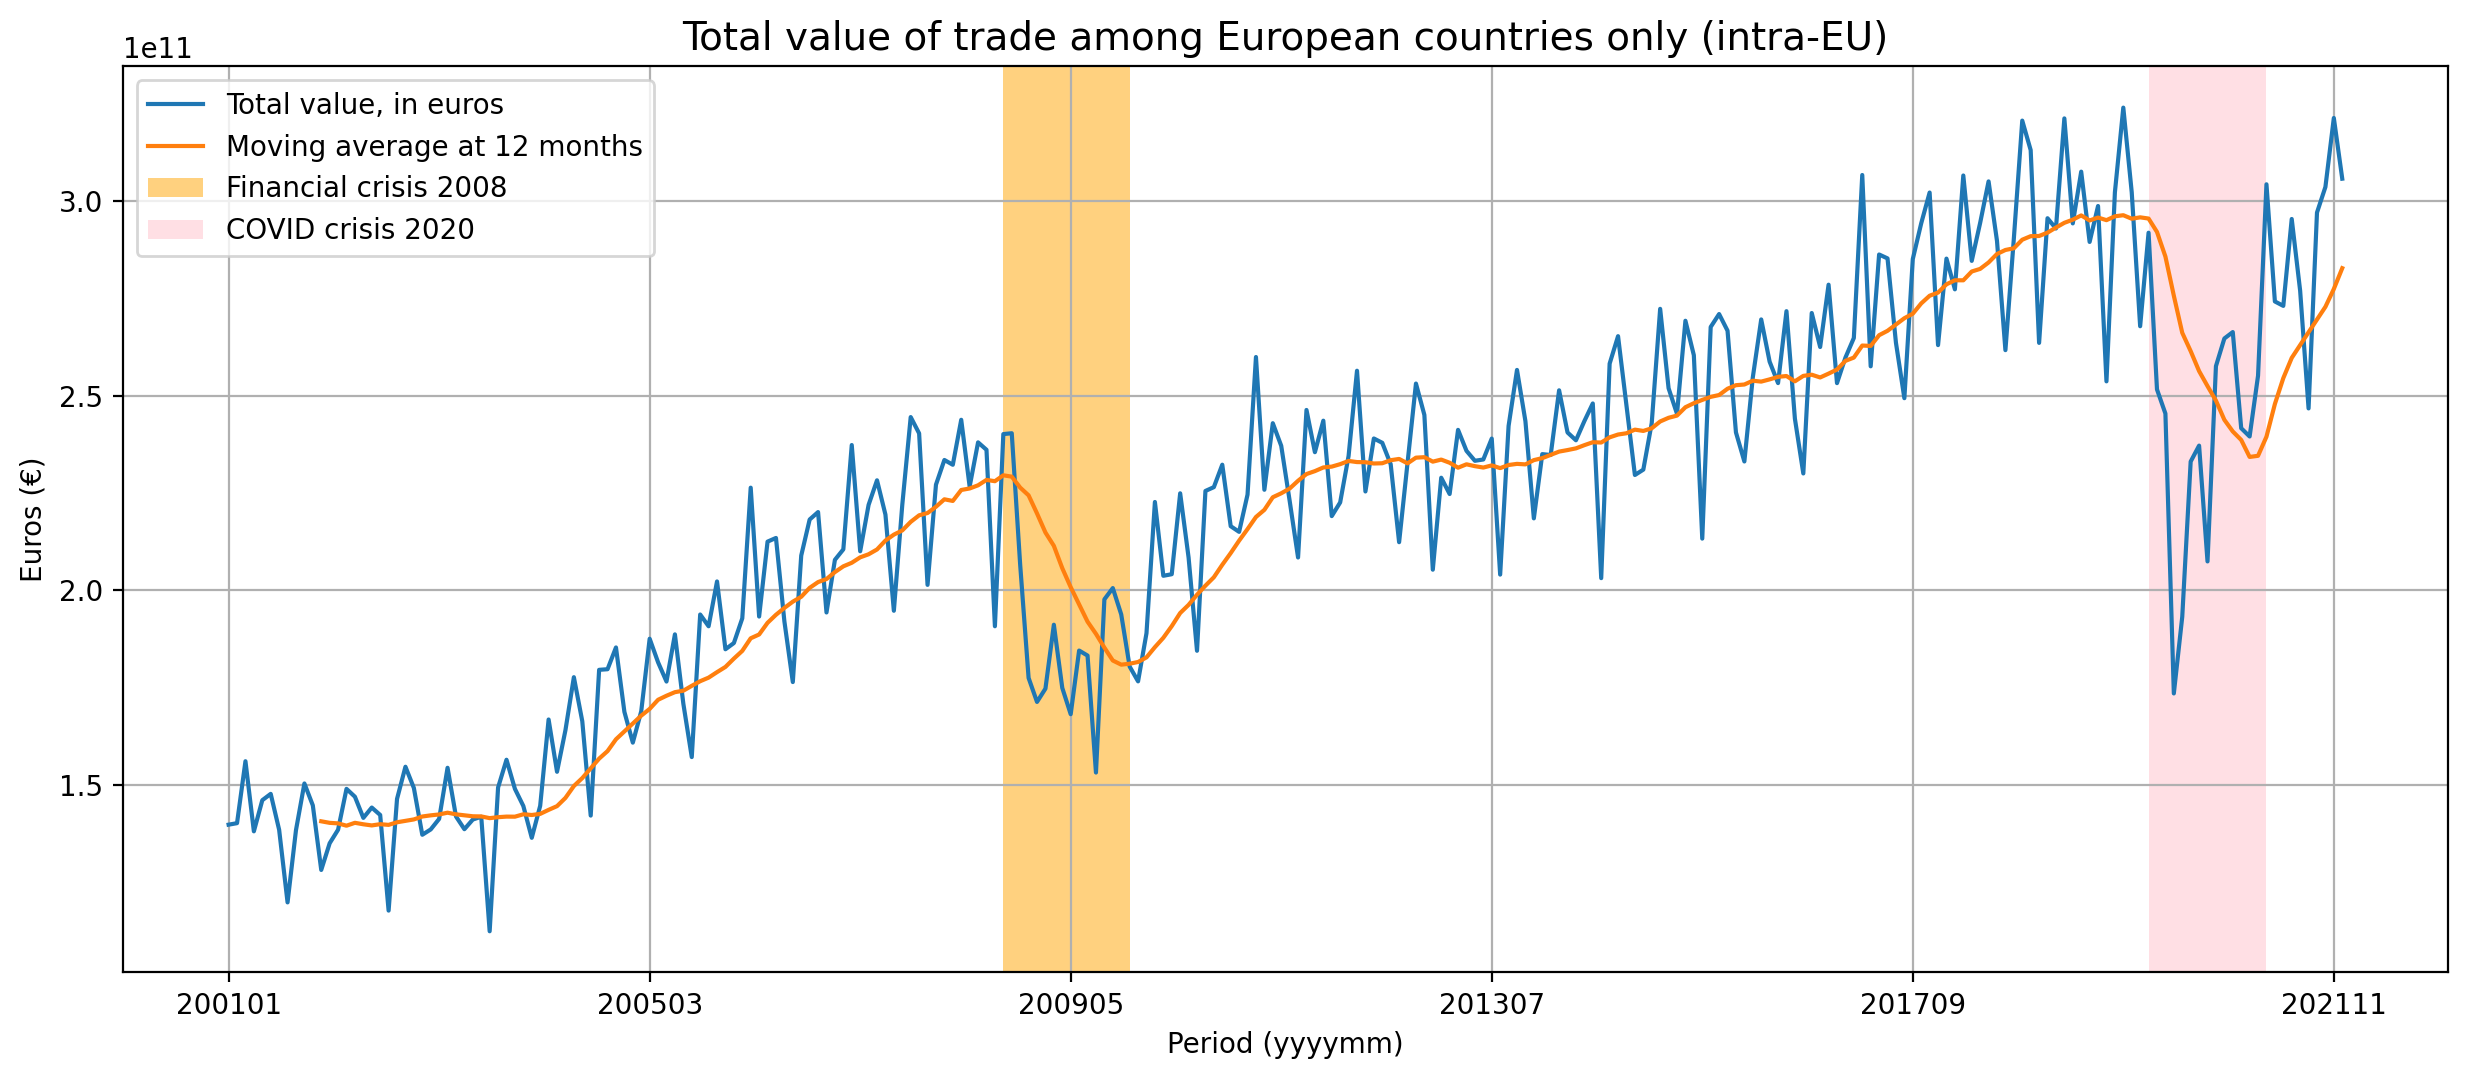

In [ ]:
plt.figure(figsize=(15,6),dpi=200,facecolor="w")
(df_sum.VALUE_IN_EUROS/2).plot(label="Total value, in euros")
(df_sum.VALUE_IN_EUROS/2).rolling(12).mean().plot(label="Moving average at 12 months")
plt.axvspan(92, 107, facecolor='orange', alpha=0.5, label="Financial crisis 2008")
plt.axvspan(228, 242, facecolor='pink', alpha=0.5, label="COVID crisis 2020")
plt.ylabel("Euros (€)",fontsize=10)
plt.xlabel("Period (yyyymm)",fontsize=10)
plt.title("Total value of trade among European countries only (intra-EU)",fontsize=14)
plt.legend()
plt.grid()
plt.savefig("./pics/TOTAL_V_INTRA.png")
plt.show()

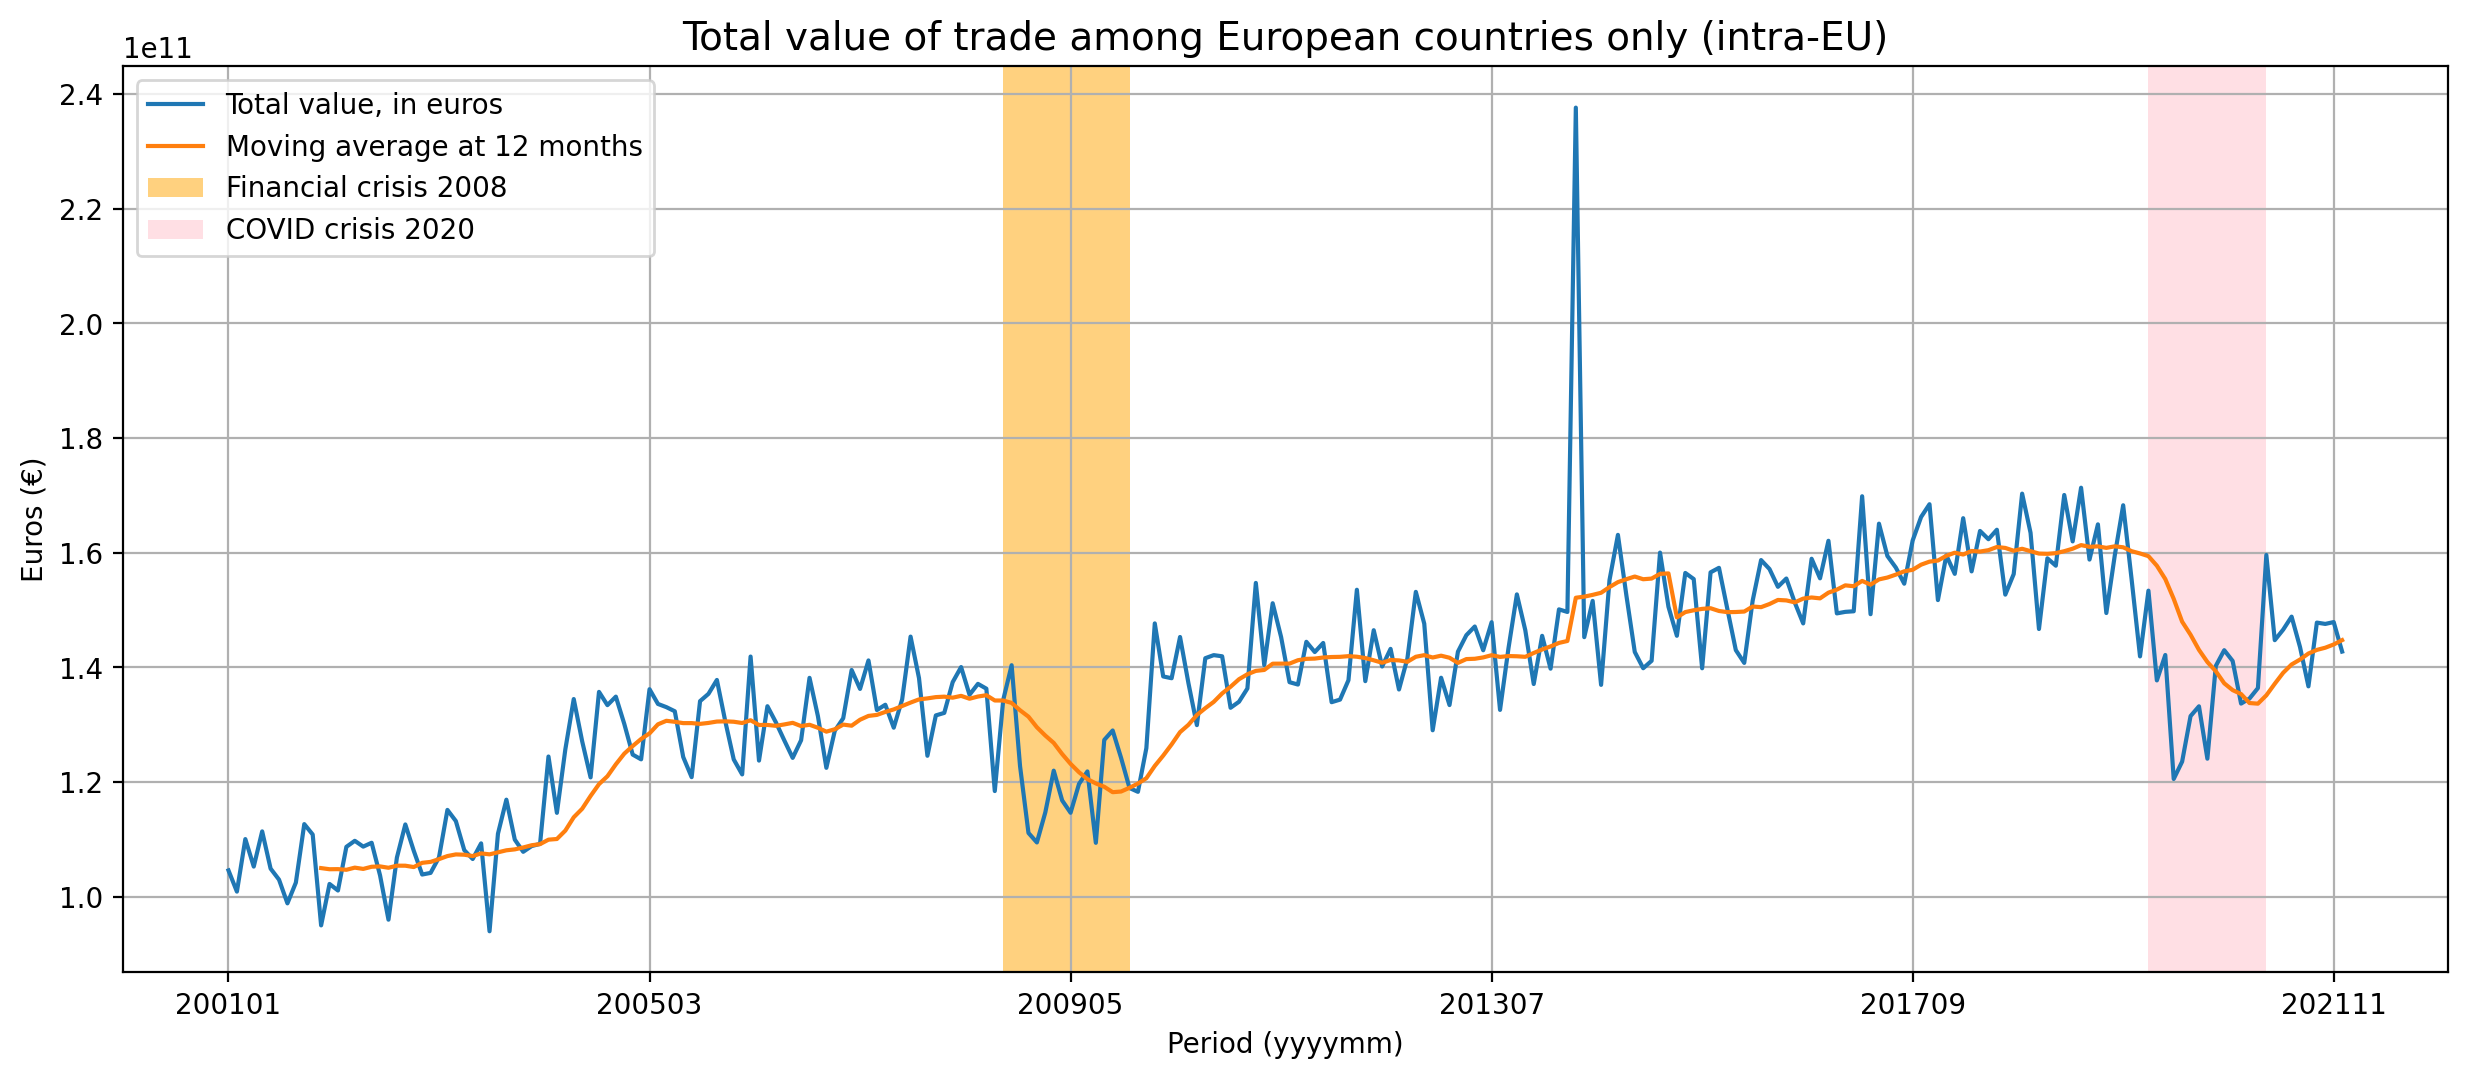

In [ ]:
plt.figure(figsize=(15,6),dpi=200,facecolor="w")
(df_sum.QUANTITY_IN_KG/2).plot(label="Total value, in euros")
(df_sum.QUANTITY_IN_KG/2).rolling(12).mean().plot(label="Moving average at 12 months")
plt.axvspan(92, 107, facecolor='orange', alpha=0.5, label="Financial crisis 2008")
plt.axvspan(228, 242, facecolor='pink', alpha=0.5, label="COVID crisis 2020")
plt.ylabel("Euros (€)",fontsize=10)
plt.xlabel("Period (yyyymm)",fontsize=10)
plt.title("Total value of trade among European countries only (intra-EU)",fontsize=14)
plt.legend()
plt.grid()
plt.savefig("./pics/TOTAL_Q_INTRA.png")
plt.show()

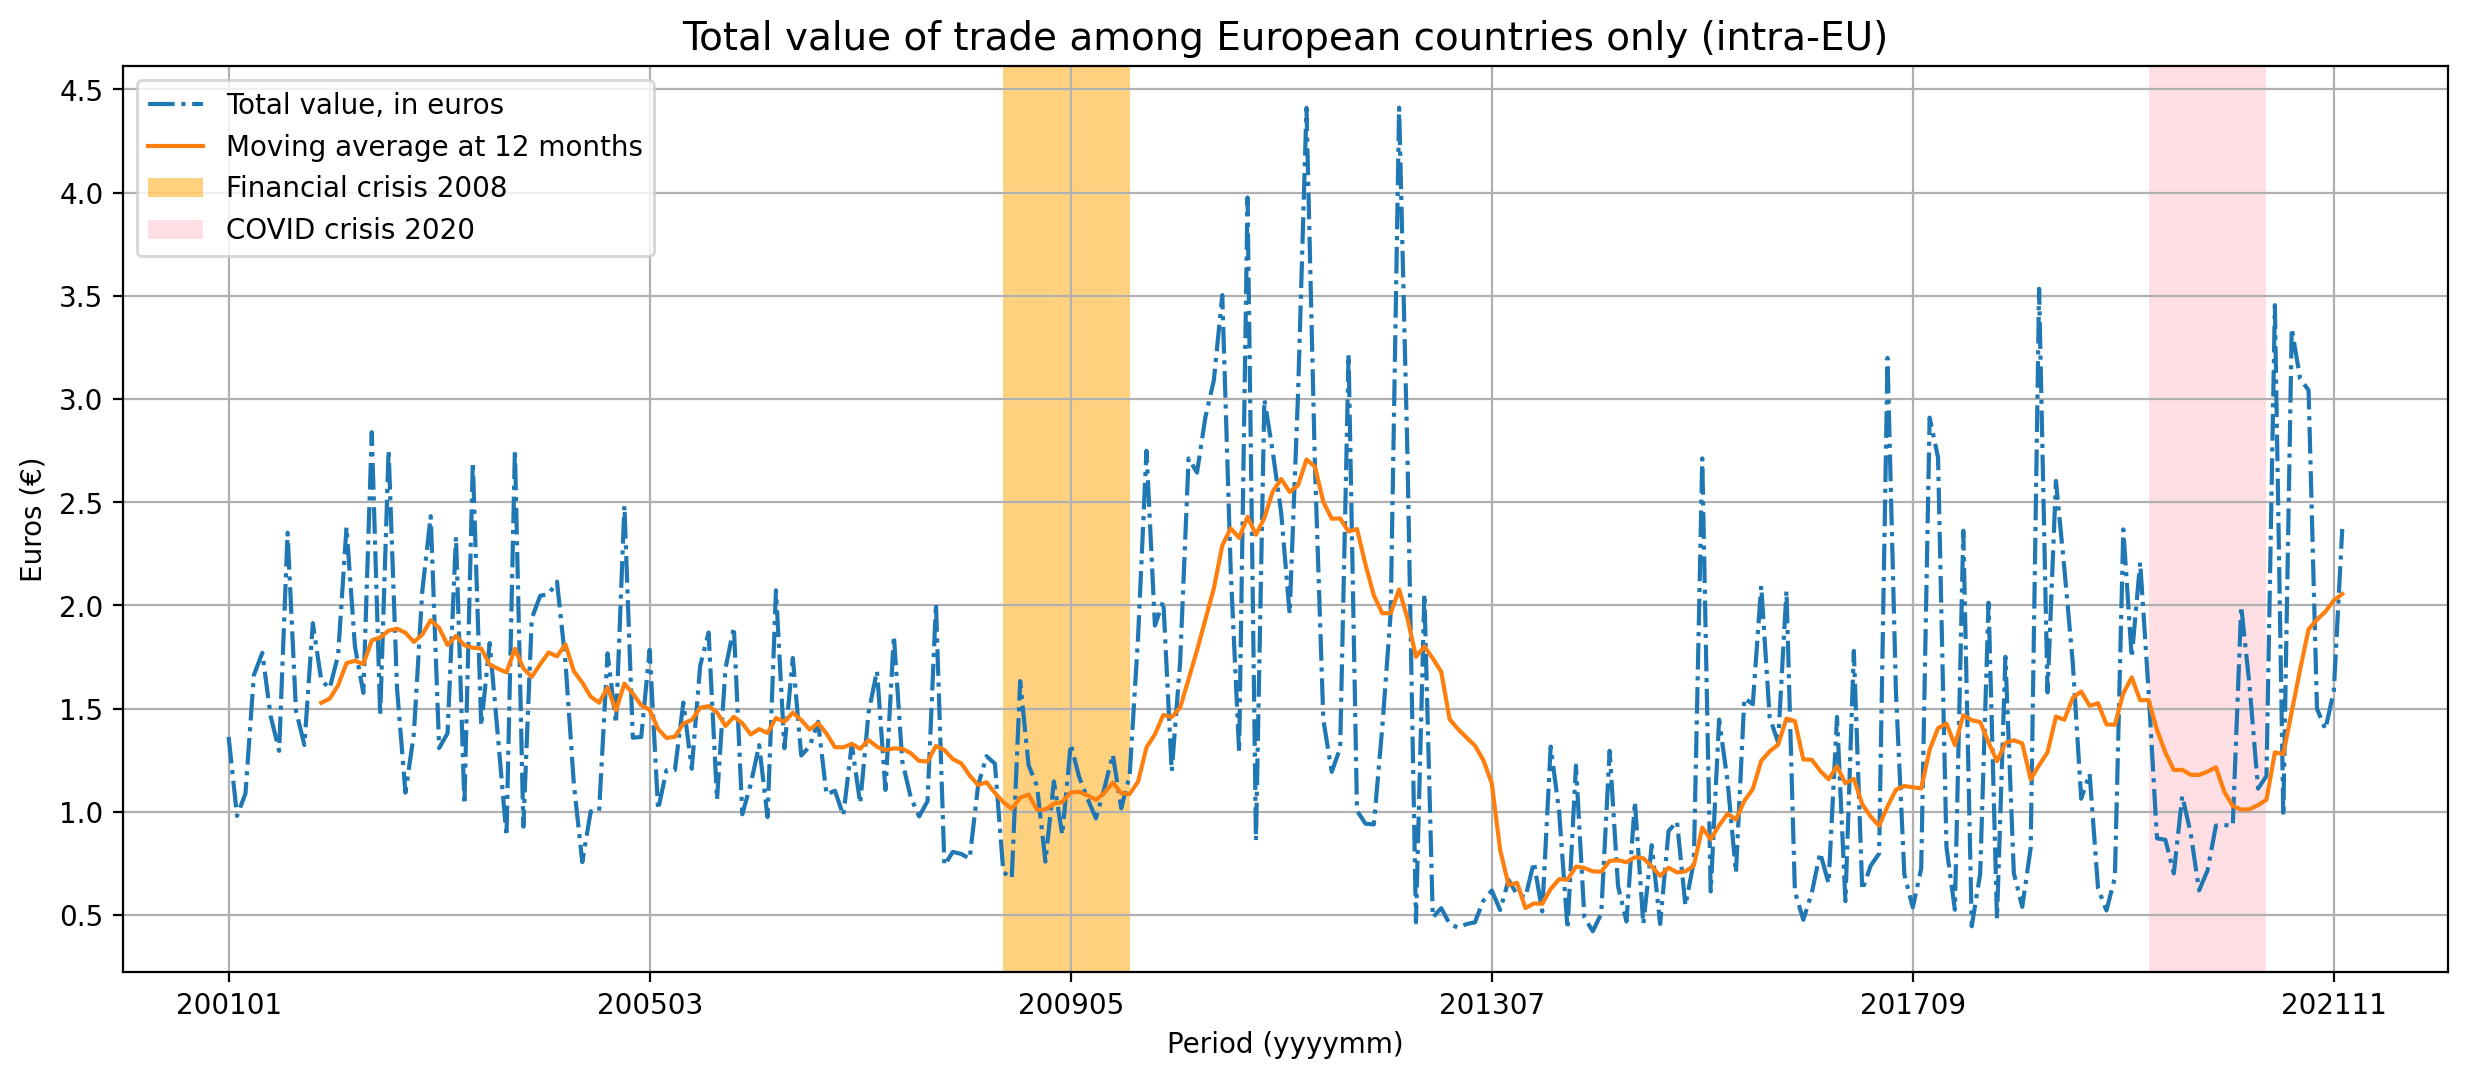

In [ ]:
plt.figure(figsize=(15,6),dpi=200,facecolor="w")
np.log10(df_price_sum.PRICE/2).plot(label="Total value, in euros",linestyle="-.")
np.log10(df_price_sum.PRICE/2).rolling(12).mean().plot(label="Moving average at 12 months")
plt.axvspan(92, 107, facecolor='orange', alpha=0.5, label="Financial crisis 2008")
plt.axvspan(228, 242, facecolor='pink', alpha=0.5, label="COVID crisis 2020")
plt.ylabel("Euros (€)",fontsize=10)
plt.xlabel("Period (yyyymm)",fontsize=10)
plt.title("Total value of trade among European countries only (intra-EU)",fontsize=14)
plt.legend()
plt.savefig("./pics/TOTAL_P_INTRA.png")
plt.grid()
plt.show()

In [ ]:
df_period = df.groupby(['PRODUCT_CPA2_1', 'DECLARANT_ISO', 'PARTNER_ISO', 'FLOW'],as_index=False).sum()

In [ ]:
dfs = []
for y in trange(2001,2022):
    dfs.append(g.extract_table_for_graph(df[(df.PERIOD >= f"{y}01")&(df.PERIOD <= f"{y}12")],y=y,pop_df=df_pop,scale_by=None))
pd.concat(dfs)

  0%|          | 0/21 [00:00<?, ?it/s]

,PRODUCT_CPA2_1,DECLARANT_ISO,PARTNER_ISO,TRADE_TYPE,FLOW,PERIOD,VALUE_IN_EUROS,QUANTITY_IN_KG,country_from,country_to
0,TOTAL,FR,DE,I,1,200103,6.539126e+09,2.856274e+09,DE,FR
1,TOTAL,FR,DE,I,1,200103,6.463509e+09,2.754186e+09,DE,FR
2,TOTAL,FR,DE,I,1,200103,6.452671e+09,2.812597e+09,DE,FR
3,TOTAL,FR,DE,I,1,200103,6.440763e+09,2.781087e+09,DE,FR
4,TOTAL,FR,DE,I,1,200103,6.437993e+09,2.824040e+09,DE,FR
...,...,...,...,...,...,...,...,...,...,...
109628,TOTAL,TM,SE,E,2,202106,1.000000e+00,3.000000e+00,SE,TM
109638,TOTAL,LS,SE,E,2,202103,0.000000e+00,1.000000e+00,SE,LS
109644,TOTAL,SZ,PL,E,2,202112,0.000000e+00,2.000000e+00,PL,SZ
109645,TOTAL,SZ,PL,E,2,202110,0.000000e+00,5.240000e+02,PL,SZ


## wto tex

In [ ]:
df = pd.read_parquet("./data-samples/wto/bilateral6/TimeseriesApiData_20220601172326.parquet")

In [ ]:
reporters = pd.read_json("./data-samples/wto/WTO_ReportingEconomies.json")
partners = pd.read_json("./data-samples/wto/WTO_PartnerEconomies.json")
iso3_to_iso2 = pd.read_csv("./data-samples/population/iso3_to_iso2.csv",na_filter=False)[["alpha-3","alpha-2"]]
wto_countries = partners[partners.columns[:-1]].merge(reporters[reporters.columns[:-1]],how="outer").merge(iso3_to_iso2, left_on="iso3A",right_on="alpha-3",how="outer")
# wto_countries = wto_countries[(~wto_countries.code.isna())&(~wto_countries["alpha-2"].isna())]
wto_countries_name = wto_countries.set_index("code")["name"].to_dict()
wto_countries_code = wto_countries.set_index("code")["alpha-2"].to_dict()

In [ ]:
def get_country_code(x):
    return wto_countries_code[f"{x:03d}"]

def get_country_name(x):
    return wto_countries_name[f"{x:03d}"]

In [ ]:
c_wto = [
        # "Reporting Country",
         "Reporting iso2",
        #  "Partner Country",
        "Partner iso2",
        'ProductOrSectorCode', 'UnitCode',
        'Year', 'Value']

df["Reporting Country"] = df.ReportingEconomyCode.apply(get_country_name)
df["Partner Country"] = df.PartnerEconomyCode.apply(get_country_name)
df["Reporting iso2"] = df.ReportingEconomyCode.apply(get_country_code)
df["Partner iso2"] = df.PartnerEconomyCode.apply(get_country_code)

In [ ]:
df_wto = df[c_wto][~df["Reporting iso2"].isna()].sort_values("Value",ascending=False)
df_wto

,Reporting iso2,Partner iso2,ProductOrSectorCode,UnitCode,Year,Value
104788,US,GB,970110,USD,2018,1595173587
102363,US,GB,970110,USD,2015,1326113570
100666,HK,US,970110,USD,2019,1215278398
105242,US,GB,970110,USD,2007,1179541567
104776,US,GB,970110,USD,2017,1160303476
...,...,...,...,...,...,...
17009,AL,AE,960899,USD,2014,0
17010,AL,TN,960899,USD,2014,0
17013,AL,AE,960899,USD,2016,0
10776,MK,TR,960860,USD,2017,0


In [ ]:
df.ReportingEconomyCode = df.ReportingEconomyCode.apply(lambda x: f"{x:03d}")
df.PartnerEconomyCode = df.PartnerEconomyCode.apply(lambda x: f"{x:03d}")

In [ ]:
df_sample = df_wto[c_wto].sample(frac=0.0005).iloc[:20]

In [ ]:
print(df_sample.to_latex(index=False).replace("  "," ").replace("  "," ").replace("  "," ").replace("  "," ").replace("  "," ").replace("  "," "))

NameError: ignored

## wto plot

In [ ]:
g.load_filtered_data("wto", save=True, force_reload=False, columns=g.full_columns, types=g.full_types,
                    group_by_prod_code=True, n_digits=2, years="all", months=None, product="all",
flow="all", trade_type="all",  declarant_iso="all", partner_iso="all")

## population tex

In [ ]:
df_pop = g.load_population_df()[0]

In [ ]:
pop_c = ['LocID', 'iso2', 'iso3', 'Country'] + [str(y) for y in range(2000,2022,5)]
pop_tex = df_pop.reset_index()[pop_c].to_latex(index=False,longtable=True)
print(pop_tex)

\begin{longtable}{rlllrrrrr}
\toprule
 LocID & iso2 & iso3 &                            Country &        2000 &        2005 &        2010 &        2015 &        2020 \\
\midrule
\endfirsthead

\toprule
 LocID & iso2 & iso3 &                            Country &        2000 &        2005 &        2010 &        2015 &        2020 \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     4 &   AF &  AFG &                        Afghanistan &   19542.982 &   24411.191 &   28189.672 &   33753.499 &   38972.230 \\
     8 &   AL &  ALB &                            Albania &    3182.021 &    3032.634 &    2913.399 &    2882.481 &    2866.849 \\
    12 &   DZ &  DZA &                            Algeria &   30774.621 &   32956.690 &   35856.344 &   39543.154 &   43451.666 \\
    16 &   AS &  ASM &                     American Samoa &      58.230 &      57.254 &      54.849 &      51.368 &      46.189 \\
    20 &   AD &  AND &  

## complete tex

In [ ]:
df_complete = g.load_filtered_data("complete", show_file_name=True, verbose=1, save=True, force_reload=False, columns=g.full_columns, types=g.full_types, 
                        group_by_prod_code=False, n_digits=2, years="all", months="all", product=["TOTAL"], 
                        flow="all", trade_type="all", declarant_iso="all", partner_iso="all")

loading complete: 

  0%|          | 0/20 [00:00<?, ?it/s]

2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 ,	 Table loaded


In [ ]:
dfs = []
for y in trange(2000,2021):
    dfs.append(g.extract_table_for_graph(df_complete[df_complete.PERIOD.str[:4] == str(y)],y=str(y),scale_by="population",pop_df=df_pop))
df_complete_norm = pd.concat(dfs).reset_index(drop=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
comp_c = ['country_from', 'country_to', 'VALUE_IN_EUROS', 'QUANTITY_IN_KG', 'population', 'VALUE_IN_EUROS_SCALED', 'QUANTITY_IN_KG_SCALED']
df_complete_norm[comp_c]

,country_from,country_to,VALUE_IN_EUROS,QUANTITY_IN_KG,population,VALUE_IN_EUROS_SCALED,QUANTITY_IN_KG_SCALED
0,FR,BM,1.382456e+09,8.162800e+06,61.763,2.238323e+07,1.321633e+05
1,FR,KY,8.951651e+08,2.530880e+07,41.054,2.180458e+07,6.164759e+05
2,FR,WF,2.593393e+08,2.019040e+07,14.852,1.746158e+07,1.359440e+06
3,CN,HK,9.336448e+10,0.000000e+00,6801.542,1.372696e+07,0.000000e+00
4,ES,GI,3.668380e+08,1.731660e+09,27.721,1.323322e+07,6.246745e+07
...,...,...,...,...,...,...,...
351496,CV,AR,2.000000e+00,0.000000e+00,45036.032,4.440889e-05,0.000000e+00
351497,MP,PL,1.000000e+00,0.000000e+00,38428.366,2.602244e-05,0.000000e+00
351498,TL,PL,1.000000e+00,0.000000e+00,38428.366,2.602244e-05,0.000000e+00
351499,ML,MM,0.000000e+00,0.000000e+00,53423.198,0.000000e+00,0.000000e+00


In [ ]:
# df_complete_norm[df_complete_norm.PERIOD == "202052"].sort_values("VALUE_IN_EUROS_SCALED",ascending=False).head(10)
df_comp_tex = df_complete_norm[df_complete_norm.PERIOD == "202052"][comp_c].sample(frac=0.001).iloc[:10].sort_values("VALUE_IN_EUROS_SCALED",ascending=False)
print(df_comp_tex.to_latex(index=False))

\begin{tabular}{llllrrrrr}
\toprule
PRODUCT\_CPA2\_1 & PERIOD & country\_from & country\_to &  VALUE\_IN\_EUROS &  QUANTITY\_IN\_KG &  population &  VALUE\_IN\_EUROS\_SCALED &  QUANTITY\_IN\_KG\_SCALED \\
\midrule
         TOTAL & 202052 &           PT &         GB &    3062165199.0 &    1850491617.0 &   67059.474 &           45663.424067 &           27594.782760 \\
         TOTAL & 202052 &           SA &         TR &    1451527517.0 &             0.0 &   84135.428 &           17252.274714 &               0.000000 \\
         TOTAL & 202052 &           TN &         DE &    1429474275.0 &     162837074.0 &   83328.988 &           17154.585809 &            1954.146785 \\
         TOTAL & 202052 &           RO &         SG &      47640967.0 &      38817719.0 &    5909.869 &            8061.256011 &            6568.287554 \\
         TOTAL & 202052 &           QA &         IN &    6942816036.0 &             0.0 & 1396387.127 &            4971.985133 &               0.000000 \\
         TO

In [ ]:
print(df_complete_norm.loc[df_comp_tex.index][comp_c].to_latex(index=False))

\begin{tabular}{llrrrrr}
\toprule
country\_from & country\_to &  VALUE\_IN\_EUROS &  QUANTITY\_IN\_KG &  population &  VALUE\_IN\_EUROS\_SCALED &  QUANTITY\_IN\_KG\_SCALED \\
\midrule
          PT &         GB &    3062165199.0 &    1850491617.0 &   67059.474 &           45663.424067 &           27594.782760 \\
          SA &         TR &    1451527517.0 &             0.0 &   84135.428 &           17252.274714 &               0.000000 \\
          TN &         DE &    1429474275.0 &     162837074.0 &   83328.988 &           17154.585809 &            1954.146785 \\
          RO &         SG &      47640967.0 &      38817719.0 &    5909.869 &            8061.256011 &            6568.287554 \\
          QA &         IN &    6942816036.0 &             0.0 & 1396387.127 &            4971.985133 &               0.000000 \\
          CZ &         EG &     381686554.0 &      54100942.0 &  107465.134 &            3551.724544 &             503.427856 \\
          LV &         BA &       3722674.

## usd eur tex

In [ ]:
df_eur = pd.read_csv("./data-samples/wto/usd_eur_ecb.csv")

In [ ]:
df_eur["year"] = df_eur.date.str[:4]
df_eur_tex = df_eur[["year","annual_value"]][~df_eur.annual_value.isna()].sort_values("year")

In [ ]:
df_eur_tex_2 = pd.concat([df_eur_tex.iloc[:df_eur_tex.shape[0]//2+1].reset_index(drop=True),df_eur_tex.iloc[df_eur_tex.shape[0]//2+1:].reset_index(drop=True)],axis=1)

In [ ]:
print(df_eur_tex_2.to_latex(index=False))

\begin{tabular}{lrlr}
\toprule
year &  annual\_value & year &  annual\_value \\
\midrule
2001 &        0.8956 & 2012 &        1.2848 \\
2002 &        0.9456 & 2013 &        1.3281 \\
2003 &        1.1312 & 2014 &        1.3285 \\
2004 &        1.2439 & 2015 &        1.1095 \\
2005 &        1.2441 & 2016 &        1.1069 \\
2006 &        1.2556 & 2017 &        1.1297 \\
2007 &        1.3705 & 2018 &        1.1810 \\
2008 &        1.4708 & 2019 &        1.1195 \\
2009 &        1.3948 & 2020 &        1.1422 \\
2010 &        1.3257 & 2021 &        1.1827 \\
2011 &        1.3920 &  NaN &           NaN \\
\bottomrule
\end{tabular}



## italy top 10 tex

In [ ]:
comp_c = ['country_from', 'country_to', 'VALUE_IN_EUROS', 'QUANTITY_IN_KG', 'population', 'VALUE_IN_EUROS_SCALED', 'QUANTITY_IN_KG_SCALED']
df_2021 = df[(df.PERIOD.str[:4] == "2021")]
df_2021_sum = df_2021.groupby(["DECLARANT_ISO","PARTNER_ISO","FLOW"],as_index=False).sum()
df_2021_norm = g.extract_table_for_graph(df_2021_sum, y="2021",scale_by="population",pop_df=df_pop)

In [ ]:
df_it_top10_I = df_2021_norm[(df_2021_norm.country_to == "IT")]
df_it_top10_E = df_2021_norm[(df_2021_norm.country_from == "IT")]

In [ ]:
pd.set_option("display.float_format", lambda x: f"{x:0.3f}")

In [ ]:
print(df_it_top10_I[comp_c].sort_values("VALUE_IN_EUROS_SCALED",ascending=False).iloc[:10].to_latex(index=False).replace("  "," ").replace("  "," ").replace("  "," ").replace("  "," "))

\begin{tabular}{llrrrrr}
\toprule
country\_from & country\_to & VALUE\_IN\_EUROS & QUANTITY\_IN\_KG & population & VALUE\_IN\_EUROS\_SCALED & QUANTITY\_IN\_KG\_SCALED \\
\midrule
 DE & IT & 75490802662.500 & 21364308622.500 & 59240.329 & 1274314.372 & 360637.913 \\
 FR & IT & 39318792743.500 & 15193672582.500 & 59240.329 & 663716.651 & 256475.155 \\
 CN & IT & 38524642760.000 & 6459833416.000 & 59240.329 & 650311.087 & 109044.523 \\
 NL & IT & 29958184669.500 & 8229757030.000 & 59240.329 & 505705.913 & 138921.528 \\
 ES & IT & 25855033335.000 & 11269613640.500 & 59240.329 & 436443.108 & 190235.501 \\
 BE & IT & 21549565065.500 & 5314351392.000 & 59240.329 & 363765.115 & 89708.337 \\
 RU & IT & 17597932037.000 & 39156394849.000 & 59240.329 & 297059.998 & 660975.310 \\
 US & IT & 15810270013.000 & 8125519333.000 & 59240.329 & 266883.562 & 137161.955 \\
 PL & IT & 12536752795.000 & 3704847066.000 & 59240.329 & 211625.307 & 62539.272 \\
 CH & IT & 11147316509.000 & 1655703488.000 & 59240.3

In [ ]:
print(df_it_top10_E[comp_c].sort_values("VALUE_IN_EUROS_SCALED",ascending=False).iloc[:10].to_latex(index=False).replace("  "," ").replace("  "," ").replace("  "," ").replace("  "," "))

\begin{tabular}{llrrrrr}
\toprule
country\_from & country\_to & VALUE\_IN\_EUROS & QUANTITY\_IN\_KG & population & VALUE\_IN\_EUROS\_SCALED & QUANTITY\_IN\_KG\_SCALED \\
\midrule
 IT & VA & 56921605.000 & 10461387.000 & 0.511 & 111392573.386 & 20472381.605 \\
 IT & GI & 1001004532.000 & 2143793766.000 & 32.669 & 30640807.248 & 65621652.515 \\
 IT & KY & 474127906.000 & 3281377.000 & 68.136 & 6958552.102 & 48159.226 \\
 IT & MH & 213689418.000 & 137891.000 & 42.050 & 5081793.532 & 3279.215 \\
 IT & VG & 134370496.000 & 337436.000 & 31.122 & 4317540.518 & 10842.362 \\
 IT & CH & 27251973254.000 & 4407077721.000 & 8691.406 & 3135508.024 & 507061.541 \\
 IT & MT & 1472661244.000 & 1717929987.000 & 526.748 & 2795760.485 & 3261388.723 \\
 IT & SI & 4612331986.500 & 3143143021.000 & 2119.410 & 2176233.946 & 1483027.362 \\
 IT & BE & 17809938868.000 & 4324903577.500 & 11611.419 & 1533829.661 & 372469.857 \\
 IT & SM & 45241094.000 & 37063680.000 & 33.745 & 1340675.478 & 1098345.829 \\
\bottomr

## Graph plots

In [ ]:
df_full_19 = g.load_filtered_data("full", save=True, force_reload=True, columns=g.full_columns, types=g.full_types,
                    group_by_prod_code=True, n_digits=2, years=[2019], months=None, product="all",
                    flow="all", trade_type="all",  declarant_iso="all", partner_iso="all")

loading full: 

  0%|          | 0/1 [00:00<?, ?it/s]

2019 ,	 Table loaded


### full plot

In [ ]:
i = 10
print(i)

10


In [ ]:
t4g = g.extract_table_for_graph(df_full_19[df_full_19.PRODUCT_CPA2_1 == "10"],y="2019",pop_df=df_pop,scale_by="population")
tab_nodes = pd.DataFrame(g.get_world_countries(df_pop, eu_iso, "2019")).set_index(0)

In [ ]:
i += 1
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in t4g[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
t4g["edg_sort"] = edg_sort
t4g = t4g.sort_values("edg_sort")
edg_list = [(a,b) for a, b in t4g[["country_from","country_to"]].values]
coord, metrics, G = g.makeGraph(t4g, weight_flag=True, weight_layout=True, compute_layout=True, lay_dist=1250, compute_metrics=False)
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(20,15),dpi=200,facecolor="w",tight_layout=True)
edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
m = max(edg_wid)
edg_wid = [(i/m)*256+30 for i in edg_wid]
nx.draw_networkx(G, pos=coord, edgelist=edg_list, edge_color=edg_colors, width=[i/60 for i in edg_wid], 
                 font_color="white", font_size=10, node_size=400, connectionstyle="Arc3, rad=0.2",
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
plt.title(f"Network of exchanges of {g.get_cat_name('full','10')} exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/full_y19_p10_{i}.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
### EUROPEAN ONLY
i += 1
t4g_eu = t4g[t4g.country_from.isin(eu_list)&t4g.country_to.isin(eu_list)].copy()
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in t4g_eu[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
t4g_eu["edg_sort"] = edg_sort
t4g_eu = t4g_eu.sort_values("edg_sort")
edg_list = [(a,b) for a, b in t4g_eu[["country_from","country_to"]].values]
coord, metrics, G = g.makeGraph(t4g_eu, weight_flag=True, weight_layout=True, compute_layout=True, lay_dist=1000, compute_metrics=False)
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(15,10),dpi=200,facecolor="w",tight_layout=True)
edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
m = max(edg_wid)
edg_wid = [(i/m)*256+30 for i in edg_wid]
nx.draw_networkx(G, pos=coord, edgelist=edg_list, edge_color=edg_colors, connectionstyle="Arc3, rad=0.2",
                 width=[i/30 for i in edg_wid], font_color="white", font_size=10, node_size=500, 
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
plt.title(f"Network of exchanges of {g.get_cat_name('full','10')} exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/full_y19_p10_eu_{i}.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### complete plot

In [12]:
df_complete_19 = g.load_filtered_data("complete", save=True, force_reload=True, columns=g.full_columns, types=g.full_types,
                    group_by_prod_code=True, n_digits=2, years=[2019], months=None, product="all",
                    flow="all", trade_type="all",  declarant_iso="all", partner_iso="all")

loading complete: 

  0%|          | 0/1 [00:00<?, ?it/s]

2019 ,	 Table loaded


In [ ]:
t4g_2 = g.extract_table_for_graph(df_complete_19[df_complete_19.PRODUCT_CPA2_1 == "10"],y="2019",pop_df=df_pop,scale_by="population")

In [ ]:
i += 1
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in t4g_2[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
t4g_2["edg_sort"] = edg_sort
t4g_2 = t4g_2.sort_values("edg_sort")
edg_list = [(a,b) for a,b in t4g_2[["country_from","country_to"]].values]
coord, metrics, G = g.makeGraph(t4g_2, weight_flag=True, compute_layout=True, lay_dist=250, compute_metrics=False)
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(20,15),dpi=200,facecolor="w",tight_layout=True)
edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
m = max(edg_wid)
edg_wid = [(i/m)*256+30 for i in edg_wid]
nx.draw_networkx(G, pos=coord, edgelist=edg_list, edge_color=edg_colors, connectionstyle="Arc3, rad=0.2",
                 width=[i/60 for i in edg_wid], font_color="white", font_size=10, node_size=300, 
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
# plt.title(f"Network of exchanges of {category} in {year}",fontsize=20)
plt.title(f"Network of exchanges of {g.get_cat_name('full','10')} exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/complete_y19_p10_{i}.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Threshold plot

In [ ]:
df_complete = g.load_filtered_data("complete", show_file_name=True, verbose=1, save=True, force_reload=False, columns=g.full_columns, types=g.full_types, 
                        group_by_prod_code=True, n_digits=2, years=[2019], months="all", product="all", 
                        flow="all", trade_type="all", declarant_iso="all", partner_iso="all")

loading complete: loading existing... Table loaded


In [ ]:
tab_nodes = pd.DataFrame(g.get_world_countries(df_pop, eu_iso, "2019")).set_index(0)

In [ ]:
# for i in range(100):
#     print(f"{i:02d}",g.get_cat_name("full",f"{i:02d}"))

1.3020194236262141 € per 1000 pp


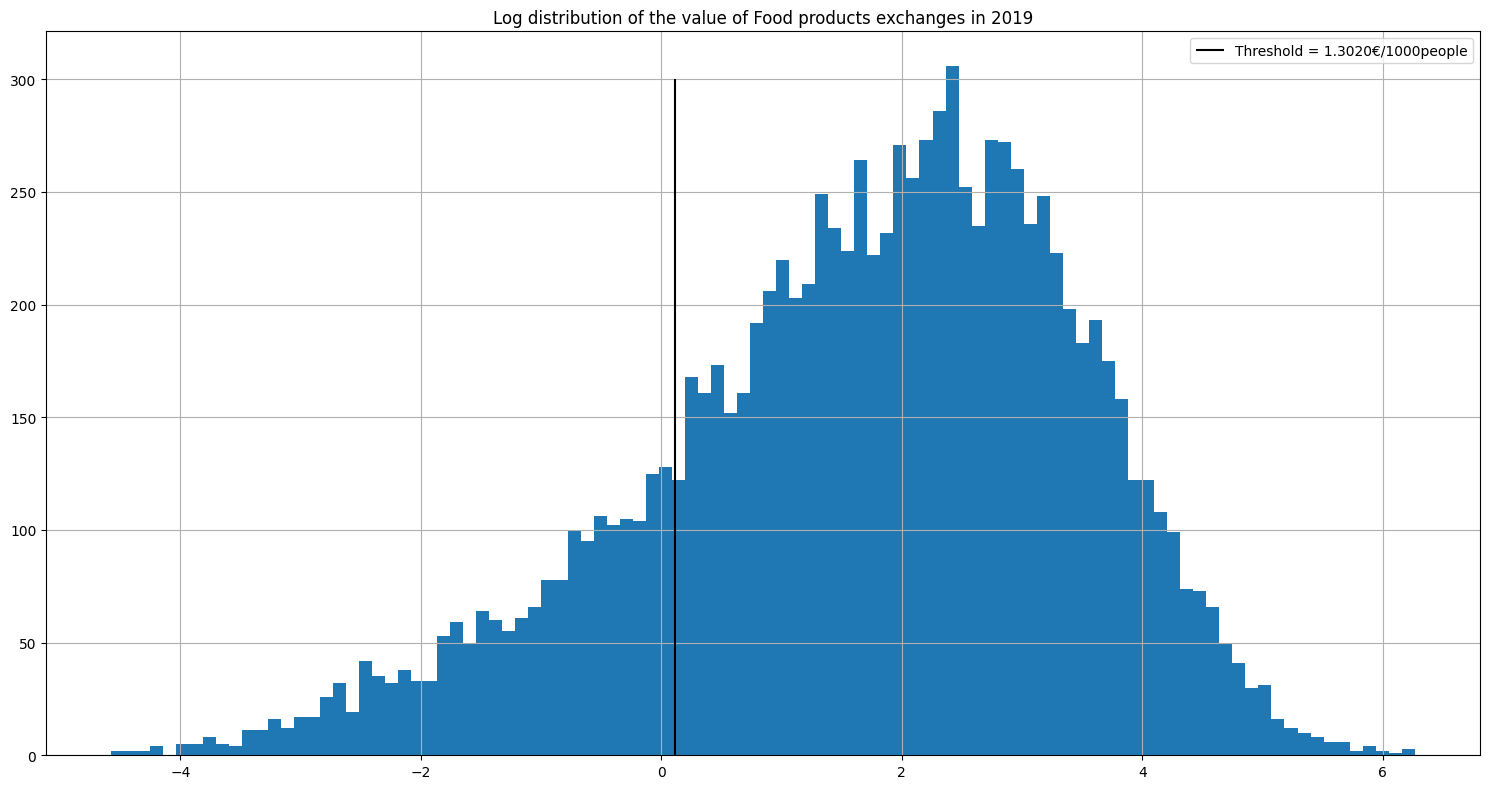

In [ ]:
prod = "10"
t4g = g.extract_table_for_graph(df_complete[df_complete.PRODUCT_CPA2_1 == prod],y="2019",pop_df=df_pop,scale_by="population")
df_sort = t4g.sort_values("VALUE_IN_EUROS_SCALED",ascending=False).reset_index(drop=True)
df_sort = df_sort[df_sort.VALUE_IN_EUROS_RESCALED.cumsum() < 0.99999]
thresh = df_sort.iloc[-1,-4]
print(thresh, "€ per 1000 pp")
plt.figure(figsize=(15,8),dpi=100,tight_layout=True)
plt.hist(np.log10(t4g.VALUE_IN_EUROS_SCALED[(t4g.VALUE_IN_EUROS_SCALED > 0)]),bins=100)
# plt.hist(t4g.VALUE_IN_EUROS_SCALED[(t4g.VALUE_IN_EUROS_SCALED > 0)],bins=100)
plt.title(f"Log distribution of the value of {g.get_cat_name('full',prod)} exchanges in 2019")
plt.vlines(np.log10(thresh),0,300,label=f"Threshold = {thresh:.4f}€/1000people")
plt.grid()
plt.legend()
plt.savefig(f"./pics/thresh_complete_y19_p10.png")
plt.show()
# Why log-normal????

In [ ]:
i += 1
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in df_sort[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
df_sort["edg_sort"] = edg_sort
df_sort = df_sort.sort_values("edg_sort")
edg_list = [(a,b) for a,b in df_sort[["country_from","country_to"]].values]
coord, metrics, G = g.makeGraph(df_sort, weight_flag=False, directed=False, compute_layout=True, lay_dist=250, compute_metrics=False)
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(20,15),dpi=200,facecolor="w",tight_layout=True)
# edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
# m = max(edg_wid)
# edg_wid = [(i/m)*256+30 for i in edg_wid]
nx.draw_networkx(G, pos=coord, edgelist=edg_list, edge_color=edg_colors,
                 font_color="white", font_size=10, node_size=300, 
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
plt.title(f"Network of exchanges of {g.get_cat_name('full',prod)} exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/complete_y19_p10_bin_{i}.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

1.3905571234304124 € per 1000 pp


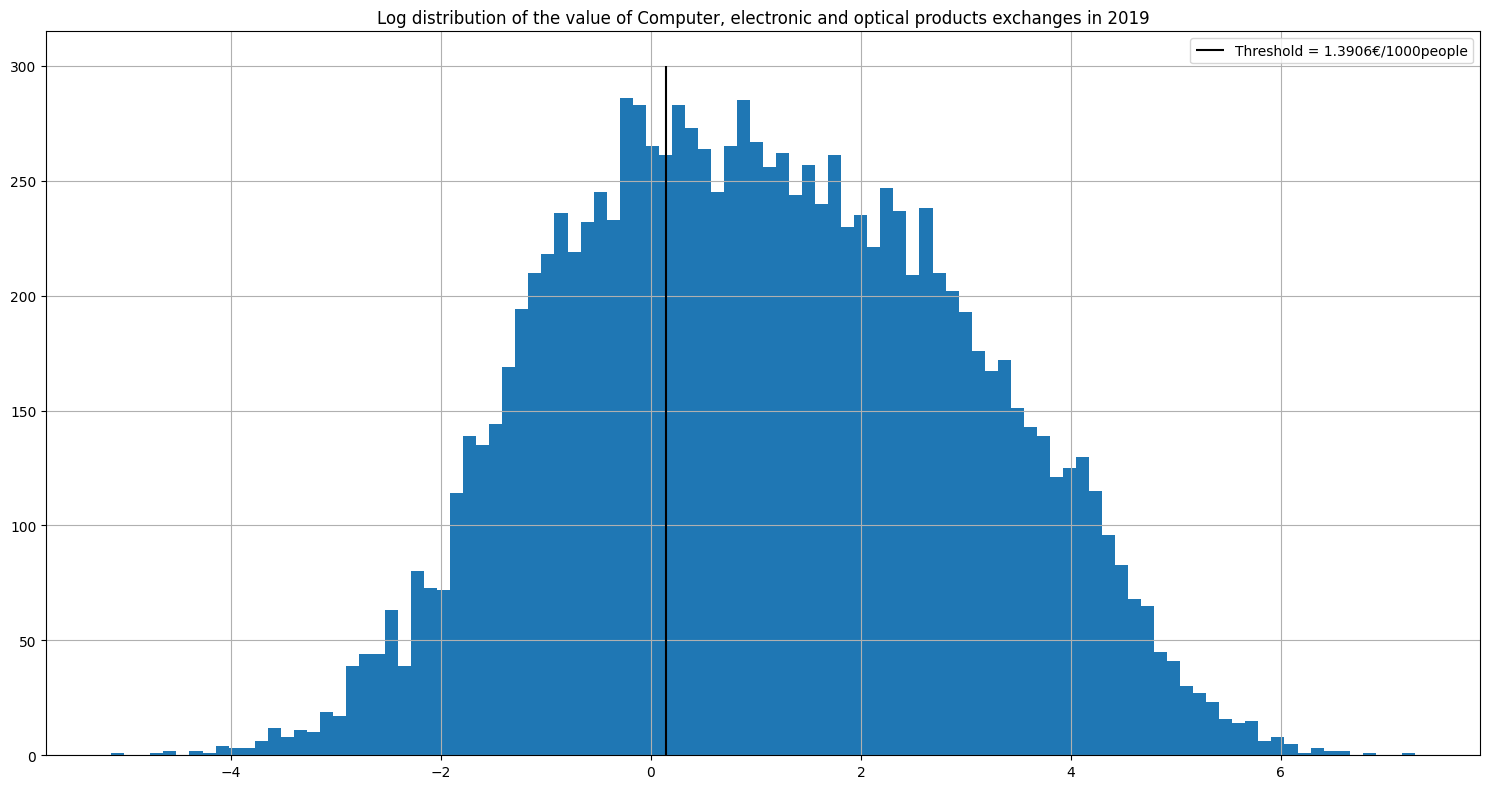

In [ ]:
prod = "26"
t4g = g.extract_table_for_graph(df_complete[df_complete.PRODUCT_CPA2_1 == prod],y="2019",pop_df=df_pop,scale_by="population")
df_sort = t4g.sort_values("VALUE_IN_EUROS_SCALED",ascending=False).reset_index(drop=True)
df_sort = df_sort[df_sort.VALUE_IN_EUROS_RESCALED.cumsum() < 0.99999]
thresh = df_sort.iloc[-1,-4]
print(thresh, "€ per 1000 pp")
plt.figure(figsize=(15,8),dpi=100,tight_layout=True)
plt.hist(np.log10(t4g.VALUE_IN_EUROS_SCALED[(t4g.VALUE_IN_EUROS_SCALED > 0)]),bins=100)
plt.vlines(np.log10(thresh),0,300,label=f"Threshold = {thresh:.4f}€/1000people")
# x = plt.hist(t4g.VALUE_IN_EUROS_SCALED[(t4g.VALUE_IN_EUROS_SCALED > 0)&(t4g.VALUE_IN_EUROS_SCALED < 10)],bins=100)
# plt.vlines(thresh,0,1000,label=f"Threshold = {thresh:.4f}€/1000people")
plt.title(f"Log distribution of the value of {g.get_cat_name('full',prod)} exchanges in 2019")
plt.grid()
plt.legend()
plt.savefig(f"./pics/thresh_complete_y19_p26.png")
plt.show()
# Why log-normal????

In [ ]:
i += 1
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in df_sort[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
df_sort["edg_sort"] = edg_sort
df_sort = df_sort.sort_values("edg_sort")
edg_list = [(a,b) for a,b in df_sort[["country_from","country_to"]].values]
coord, metrics, G = g.makeGraph(df_sort, weight_flag=False, directed=False, compute_layout=True, lay_dist=250, compute_metrics=False)
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(20,15),dpi=200,facecolor="w",tight_layout=True)
# edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
# m = max(edg_wid)
# edg_wid = [(i/m)*256+30 for i in edg_wid]
nx.draw_networkx(G, pos=coord, edgelist=edg_list, edge_color=edg_colors,
                 font_color="white", font_size=10, node_size=300, 
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
plt.title(f"Network of exchanges of {g.get_cat_name('full',prod)} exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/complete_y19_p26_bin_{i}.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Geographical plot

In [ ]:
# !pip install utm
# import utm

In [11]:
geo_coords = pd.read_csv("./data-samples/countries_centroids.csv",na_filter=False)

In [13]:
t4g = g.extract_table_for_graph(df_complete_19[df_complete_19.PRODUCT_CPA2_1 == "TO"],y="2019",pop_df=df_pop,scale_by="population")
tab_nodes = pd.DataFrame(g.get_world_countries(df_pop, eu_iso, "2019")).set_index(0)

In [5]:
geo_tab = geo_coords[(geo_coords.ISO.isin(tab_nodes.index))]
not_geo = set(tab_nodes.index).difference(set(geo_coords.ISO[(geo_coords.ISO.isin(tab_nodes.index))]))

In [6]:
geo_dict = geo_tab[~geo_tab.ISO.duplicated()].set_index("ISO")[["longitude","latitude"]].to_dict(orient="index")
coords_dict = {k:(geo_dict[k]["longitude"],geo_dict[k]["latitude"]) for k in geo_dict}
# coords_dict["EH"] = (24.670128, -13.798497)
# coords_dict["HK"] = (22.351136, 114.166839)
# coords_dict["MO"] = (22.191166, 113.553902)
# coords_dict["TW"] = (23.717733, 121.123670)
# coords_dict["XK"] = (42.659436, 20.872891)
coords_dict["EH"] = (-13.798497, 24.670128)
coords_dict["HK"] = (114.166839, 22.351136)
coords_dict["MO"] = (113.553902, 22.191166)
coords_dict["TW"] = (121.123670, 23.717733)
coords_dict["XK"] = (20.872891, 42.659436)
# coords_dict = {c:coords_dict[c] for c in tab_nodes.index}
# coords_dict = {c:utm.from_latlon(*coords_dict[c])[:2] for c in coords_dict}

In [ ]:
i += 1
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in t4g[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
t4g["edg_sort"] = edg_sort
t4g = t4g.sort_values("edg_sort")
## keep only top 5 imports
n_edges = 5
t4g = t4g.assign(rn=t4g.sort_values("VALUE_IN_EUROS_SCALED", ascending=False).groupby(["country_to"]).cumcount() + 1)\
        .query(f"rn <= {n_edges}").sort_values(["edg_sort","country_to","VALUE_IN_EUROS_SCALED"],ascending=[True,True,False])
edg_list = [(a,b) for a, b in t4g[["country_from","country_to"]].values]
coord, metrics, G = g.makeGraph(t4g, weight_flag=True, weight_layout=True, compute_layout=True, lay_dist=1250, compute_metrics=False)
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(20,17),dpi=200,facecolor="w",tight_layout=True)
edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
m = max(edg_wid)
edg_wid = [(i/m)*7+1 for i in edg_wid]
nx.draw_networkx(G, pos={c:coords_dict[c] for c in G.nodes()}, edgelist=edg_list, edge_color=edg_colors, 
                 width=edg_wid, arrowsize=20, font_color="white", font_size=10, 
                 node_size=[tab_nodes.loc[c][1]["pop"]/300+400 for c in G.nodes()], connectionstyle="Arc3, rad=0.2",
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
# plt.title(f"Network of {g.get_cat_name('full','TO')} Exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/full_y19_pTO_geo_{i}.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
i = 26

32


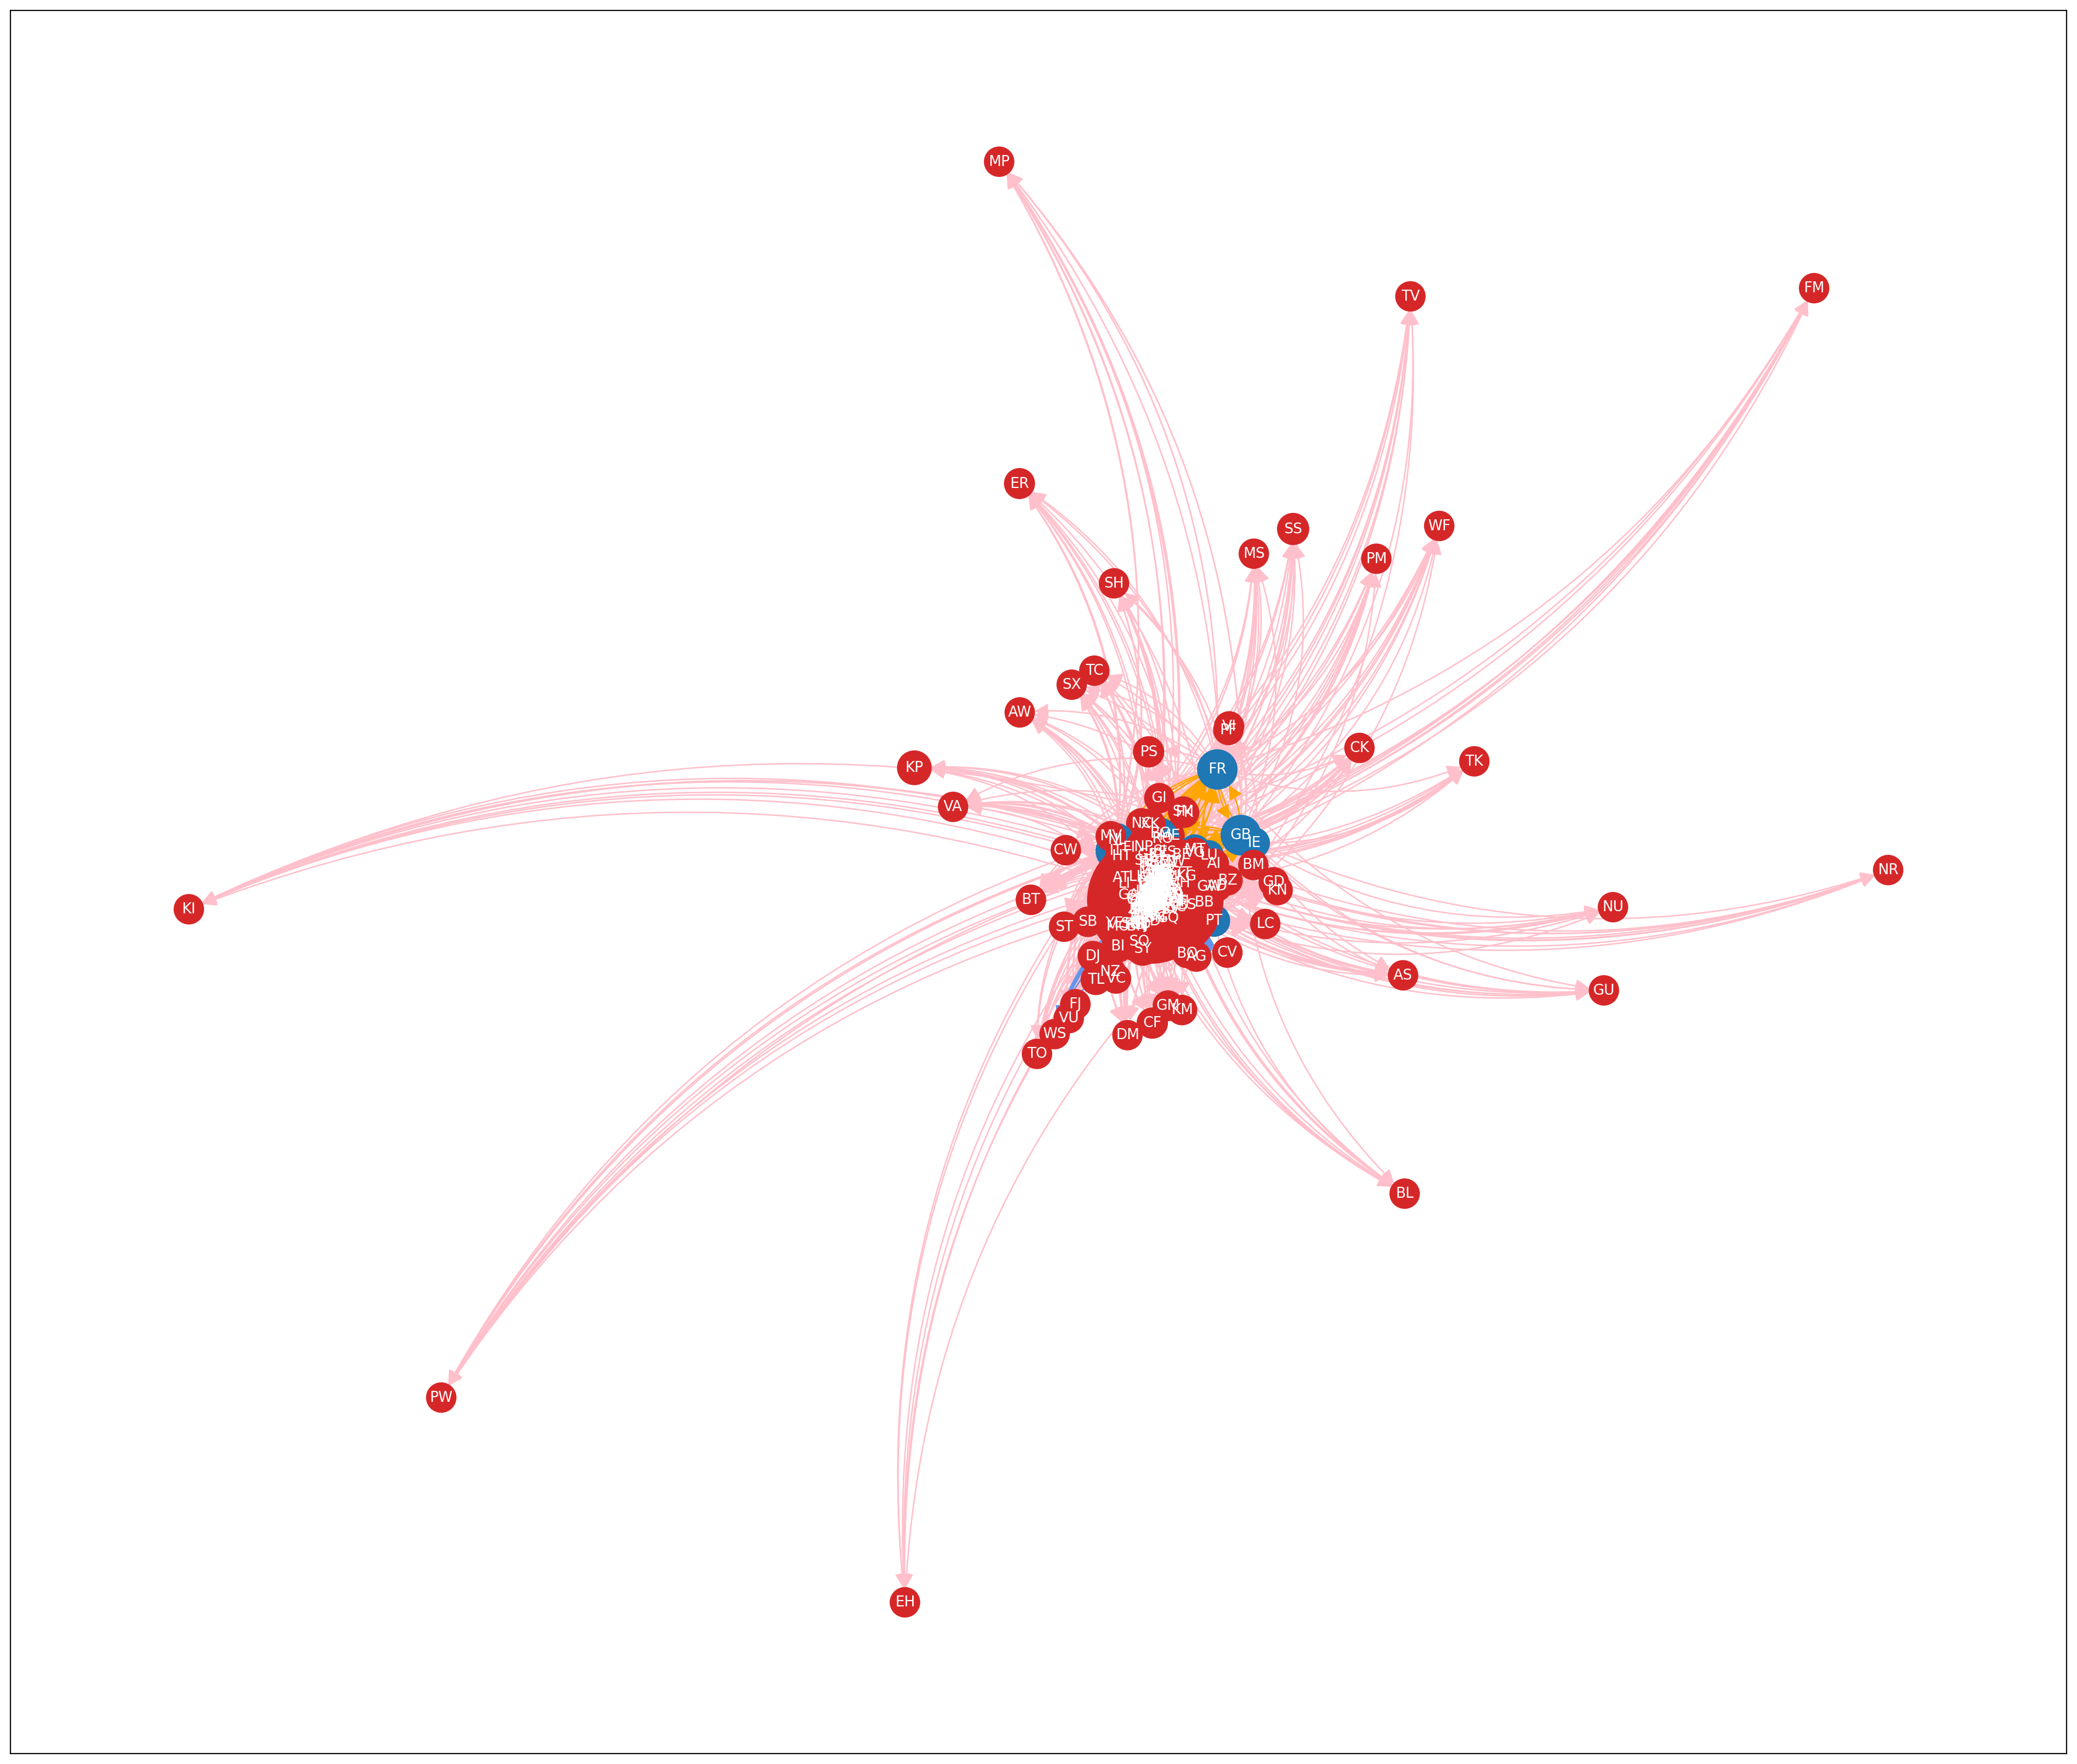

In [25]:
i += 1
eu_list = eu_iso.to_list()
edg_sort = []
for a, b in t4g[["country_from","country_to"]].values:
    if a in eu_list and b in eu_list:
        edg_sort.append(3)
    elif a in eu_list or b in eu_list:
        edg_sort.append(1)
    else:
        edg_sort.append(2)
t4g["edg_sort"] = edg_sort
t4g = t4g.sort_values("edg_sort")
coord, metrics, G = g.makeGraph(t4g, weight_flag=True, weight_layout=True, compute_layout=False, 
                                lay_dist=10, compute_metrics=True, lay_it=10000, colab=colab)
## show only top 5 imports
n_edges = 10
t4g_cut = t4g.assign(rn=t4g.sort_values("VALUE_IN_EUROS_SCALED", ascending=False).groupby(["country_to"]).cumcount() + 1)\
        .query(f"rn <= {n_edges}").sort_values(["edg_sort","country_to","VALUE_IN_EUROS_SCALED"],ascending=[True,True,False])
edg_list = [(a,b) for a, b in t4g_cut[["country_from","country_to"]].values]
edg_colors = []
for a, b in edg_list:
    if a in eu_list and b in eu_list:
        edg_colors.append("orange")
    elif a in eu_list or b in eu_list:
        edg_colors.append("pink")
    else:
        edg_colors.append("cornflowerblue")
plt.figure(figsize=(20,17),dpi=200,facecolor="w",tight_layout=True)
edg_wid = [G.get_edge_data(u,v)["weight"] for u,v in G.edges()]
m = max(edg_wid)
edg_wid = [(i/m)*7+1 for i in edg_wid]
nx.draw_networkx(G, pos=coord, edgelist=edg_list, edge_color=edg_colors, 
                 width=edg_wid, arrowsize=20, font_color="white", font_size=10, 
                 node_size=[tab_nodes.loc[c][1]["pop"]/200+400 for c in G.nodes()], connectionstyle="Arc3, rad=0.2",
                 node_color=["tab:blue" if tab_nodes.loc[c,1]["eu"] else "tab:red" for c in G.nodes()])
# plt.title(f"Network of {g.get_cat_name('full','TO')} Exchanges in 2019",fontsize=20)
plt.savefig(f"./pics/graphs/full_y19_pTO_force_{i}.png")
print(i)
plt.show()

In [17]:
metrics.loc[["IT"]]

,edges,nodes,size,degree,degree_perc,out_degree,out_degree_perc,in_degree,in_degree_perc,density,...,in_degree_gamma,in_degree_xmin,out_degree_gamma,out_degree_xmin,in_weight_degree_gamma,in_weight_degree_xmin,out_weight_degree_gamma,out_weight_degree_xmin,out_weight_abs,in_weight_abs
country,,,,,,,,,,,,,,,,,,,,,
IT,16602,225,1.116797e+09,370,1.651786,160,0.714286,210,0.9375,0.329405,...,1.256758,1.0,1.243817,1.0,1.07507,1.0,1.086377,1.0,3.194564e+11,4.254579e+11
